### NOAA Dataset Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets
temperature_data = pd.read_csv(r"C:\Users\91963\Downloads\temperature (1) (1) (1).csv")
bin_size_data = pd.read_csv(r"C:\Users\91963\Downloads\BinSize (1) (1) (1).csv")

#### Data Familiarization

In [3]:
# Display the first few rows of the dataset
temperature_data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
# Get the DataFrame information
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [5]:
# Size of the DataFrame
temperature_data.shape

(165085, 4)

In [6]:
# Generate descriptive statistics
temperature_data.describe()

,Data_Value
count,165085.000000
mean,95.422116
std,123.515131
min,-343.000000
25%,0.000000
50%,94.000000
75%,189.000000
max,406.000000


In [7]:
bin_size_data.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


In [8]:
bin_size_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  y          18259 non-null  float64
 11  x_group    18258 non-null  object 
 12  y_group    18259 non-null  object 
 13  xy_group   18259 non-null  object 
 14  hash       18259 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.1+ MB


In [9]:
bin_size_data.shape

(18259, 15)

In [10]:
bin_size_data.describe()

,LATITUDE,LONGITUDE,ELEVATION,WMOID,x,y
count,18259.000000,18259.000000,18259.000000,6171.000000,1.825900e+04,1.825900e+04
mean,36.862167,-54.090018,582.410685,58389.632799,-4.328554e+06,4.098892e+06
std,22.016258,81.612630,713.235554,26847.030026,6.932991e+06,2.448100e+06
min,-90.000000,-179.983000,-999.900000,1001.000000,-1.922509e+07,-1.000756e+07
25%,34.411800,-110.100000,88.000000,34318.000000,-8.820602e+06,3.826423e+06
50%,41.109200,-88.190600,281.000000,67315.000000,-7.363517e+06,4.571141e+06
75%,47.531100,5.226550,806.100000,74504.000000,3.517924e+05,5.285225e+06
max,82.516700,179.320000,4701.000000,98851.000000,1.970828e+07,9.175451e+06


In [11]:
#Checking for missing values
bin_size_data.isnull().sum()

ID               0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
STATE         5452
NAME             0
GSNFLAG      17332
HCNFLAG      16877
WMOID        12088
x                0
y                0
x_group          1
y_group          0
xy_group         0
hash             0
dtype: int64

#### Data Cleaning and Leap Day Removal

In [12]:
# Convert the 'date' column to datetime
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

In [13]:
# Remove leap days
temperature_data = temperature_data[temperature_data['Date'].dt.month != 2 | (temperature_data['Date'].dt.day != 29)]

#### Generate Record High and Low Temperatures (2005-2014)

In [14]:
# Filter data for the years 2005 to 2014
historical_data = temperature_data[(temperature_data['Date'].dt.year >= 2005) & (temperature_data['Date'].dt.year <= 2014)]

# Pivot data for high and low temperatures
highs = historical_data[historical_data['Element'] == 'TMAX'].groupby(historical_data['Date'].dt.dayofyear)['Data_Value'].max()
lows = historical_data[historical_data['Element'] == 'TMIN'].groupby(historical_data['Date'].dt.dayofyear)['Data_Value'].min()

# Create a DataFrame for plotting
temperature_records = pd.DataFrame({'High': highs, 'Low': lows})
temperature_records.index.name = 'Day of Year'
temperature_records.reset_index(inplace=True)

#### Plotting Highs and Lows

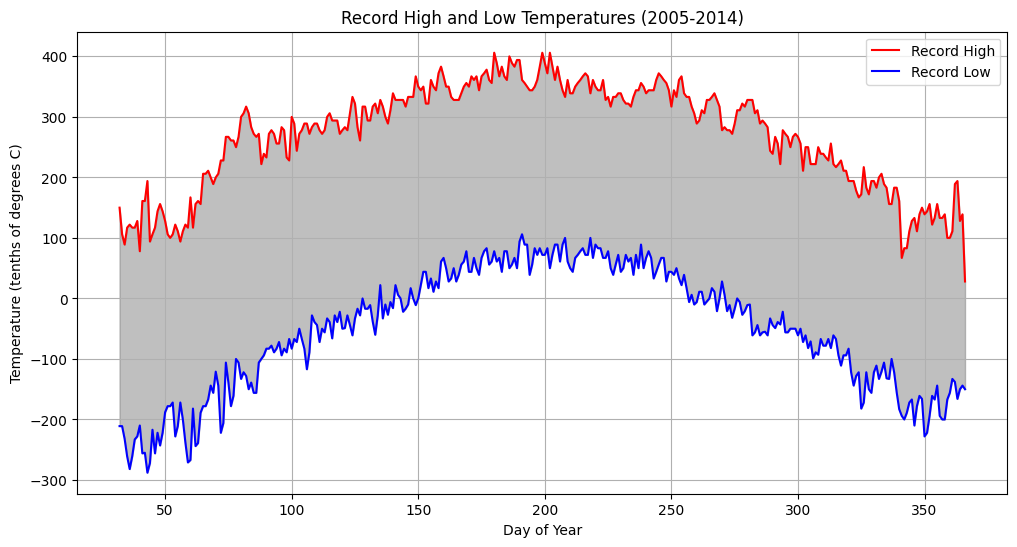

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(temperature_records['Day of Year'], temperature_records['High'], label='Record High', color='red')
plt.plot(temperature_records['Day of Year'], temperature_records['Low'], label='Record Low', color='blue')
plt.fill_between(temperature_records['Day of Year'], temperature_records['High'], temperature_records['Low'], color='gray', alpha=0.5)
plt.title('Record High and Low Temperatures (2005-2014)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.legend()
plt.grid()
plt.show()

#### Overlay 2015 Data for Record Breaks

In [16]:
# Filter 2015 data
data_2015 = temperature_data[temperature_data['Date'].dt.year == 2015]

# Identify record breaks
record_breaks = data_2015[(data_2015['Element'] == 'TMAX') & (data_2015['Data_Value'] > highs.loc[data_2015['Date'].dt.dayofyear].values)]
record_breaks_lows = data_2015[(data_2015['Element'] == 'TMIN') & (data_2015['Data_Value'] < lows.loc[data_2015['Date'].dt.dayofyear].values)]

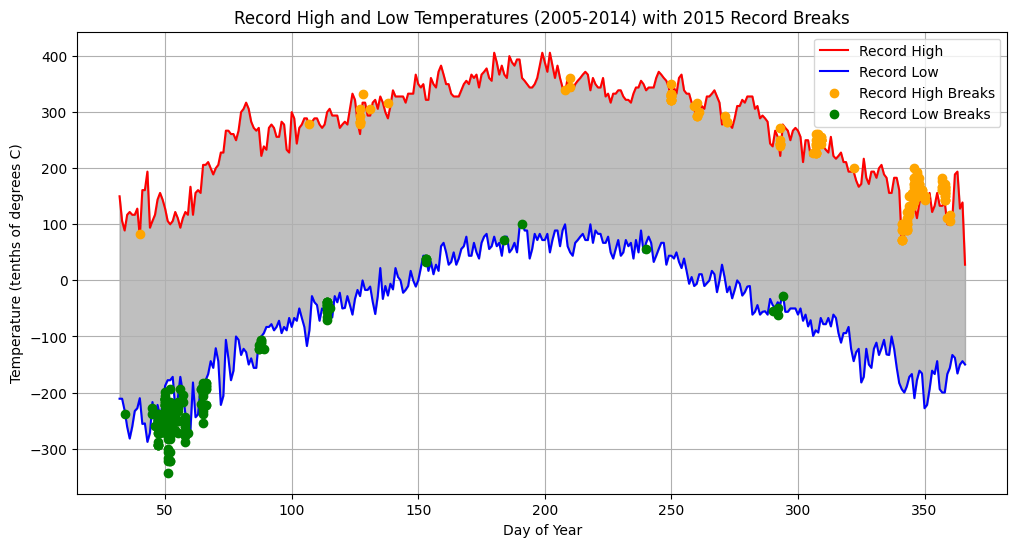

In [17]:
# Overlay the scatter points
plt.figure(figsize=(12, 6))
plt.plot(temperature_records['Day of Year'], temperature_records['High'], label='Record High', color='red')
plt.plot(temperature_records['Day of Year'], temperature_records['Low'], label='Record Low', color='blue')
plt.fill_between(temperature_records['Day of Year'], temperature_records['High'], temperature_records['Low'], color='gray', alpha=0.5)

# Scatter plot for record breaks
plt.scatter(record_breaks['Date'].dt.dayofyear, record_breaks['Data_Value'], color='orange', label='Record High Breaks', zorder=5)
plt.scatter(record_breaks_lows['Date'].dt.dayofyear, record_breaks_lows['Data_Value'], color='green', label='Record Low Breaks', zorder=5)

plt.title('Record High and Low Temperatures (2005-2014) with 2015 Record Breaks')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.legend()
plt.grid()
plt.show()

#### Visualize the Stations on a Map

In [18]:
import folium

In [19]:
# Filter the bin_size_data to include only necessary columns (assuming 'LATITUDE', 'LONGITUDE', 'NAME' columns exist)
stations = bin_size_data[['LATITUDE', 'LONGITUDE', 'NAME']].dropna()

In [20]:

# Create a Folium map centered around Ann Arbor, Michigan (42.2808° N, 83.7430° W)
ann_arbor_map = folium.Map(location=[42.2808, -83.7430], zoom_start=10)

# Add markers for each station
for index, row in stations.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['NAME'],  # This will display the station name in a popup
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(ann_arbor_map)

In [21]:
# Save the map to an HTML file and display
ann_arbor_map.save('ann_arbor_stations_map.html')

#### Temperature Summary for Ann Arbor in 2015

In [37]:
# Replace 'ID' with actual station ID related to Ann Arbor if necessary
ann_arbor_stations = bin_size_data[bin_size_data['NAME'].str.contains('Ann Arbor')]

In [42]:
# Perform the merge
combined_data = temperature_data.merge(ann_arbor_stations, on='ID', how='inner')

In [38]:
# Check if there are any IDs for Ann Arbor stations
if not ann_arbor_stations.empty:
    # Filter temperature data for Ann Arbor using the station IDs
    ann_arbor_temp_data = temperature_data[
        (temperature_data['ID'].isin(ann_arbor_stations['ID'])) &
        (temperature_data['Date'].dt.year == 2015)
    ]
    
    #  Check for data points
    print(ann_arbor_temp_data)
    
    # Create a temperature summary for Ann Arbor
    temperature_summary = ann_arbor_temp_data.groupby(ann_arbor_temp_data['Date'].dt.date).agg({
        'Dataalue': ['mean', 'max', 'min']
    }).reset_index()

    # Rename the columns for clarity
    temperature_summary.columns = ['date', 'average_temp', 'max_temp', 'min_temp']

    #  Plot the summary
    plt.figure(figsize=(12, 6))
    plt.plot(temperature_summary['date'], temperature_summary['average_temp'], label='Average Temperature', color='orange')
    plt.plot(temperature_summary['date'], temperature_summary['max_temp'], label='Maximum Temperature', color='red')
    plt.plot(temperature_summary['date'], temperature_summary['min_temp'], label='Minimum Temperature', color='blue')
    plt.title('Temperature Summary for Ann Arbor, Michigan (2015)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (tenths of degrees C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("No stations found for Ann Arbor.")

No stations found for Ann Arbor.
